<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Estudiante1;rol</h3>
    <h3 align="center">Estudiante2;rol</h3>
    <h3 align="center">Agosto de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b></font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 16 de septiembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Limpiando Datos (15p)

Como se mencionó en la ayudantía de laboratorio, la limpieza de datos es algo importante que se debe realizar antes de trabajar con un conjunto de datos, en esta sección trabajará con el dataset "limpieza.csv". Se espera que usted sea capaz de evidenciar las fallas dentro de este dataset y después de realizar la limpieza presente el dataset final resultante para comparar. 

>**Importante:** Si bien la limpieza es subjetiva, no optará a todo el puntaje de esta sección si presenta una limpieza incompleta (se observa que su dataset final se puede limpiar más a simple vista).

In [26]:
%%time
import pandas as pd

def codidifcar_genero(gen):
    # Codificacion para la columna "genero"
    if gen in {'hombre', 'masculino'}:
        return 'm'
    return 'f'

# Se crea el Dataframe
df = pd.read_csv("limpieza.csv")

# Se separa la columna "trabajo" en "estado_trabajo" y "salario". Luego se elimina "trabajo".
df[['estado_trabajo', 'salario']] = df.trabajo.str.split('/', expand=True)
df['salario'] = df.salario.apply(lambda sal: sal.replace('$', '')).astype(int)
df = df.drop("trabajo", axis=1)

# Se dejan las columnas "genero" y "mascota" en minusculas y se hace una codificacion para la columna "genero".
df['genero'] = df.genero.apply(lambda gen: gen.lower())
df['mascota'] = df.mascota.apply(lambda mas: mas.lower())
df['genero'] = df.genero.apply(codidifcar_genero)

print(df.head())

  genero mascota  edad   e_civil estado_trabajo  salario
0      m    gato    44     viud@    dependiente   500000
1      m      no    70    casad@    dependiente   100000
2      f      no    54   solter@    dependiente   500000
3      m   perro    47  separad@  independiente   200000
4      f    gato    33    casad@    dependiente   500000
Wall time: 103 ms


## 2. Apps en la Playstore (35p)

Google Play Store actualmente posee una enorme cantidad de aplicaciones que pueden ser descargadas por los usuarios. En esta sección utilizará una pequeña parte de dicho universo y trabajará principalmente en análisis exploratorio de los datos para responder las preguntas que verá a continuación. 

El archivo a utilizar es "googleplaystore.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/lava18/google-play-store-apps)

>PD: Hay 1 fila mala en el dataset, no es difícil de identificar.

>a) ¿Es posible observar alguna concentración de ratings de las aplicaciones en torno a un intervalo? Si su respuesta es sí, ¿Qué rango/s tiene/n mayor concentración?

>b) ¿Qué grupo tiene ratings más dispersos, las aplicaciones que pertenecen a la categoría de "EDUCATION" o las que pertenecen a la categoría de "MEDICAL"? Utilice al menos 1 recurso visual y 1 medida de tendencia para responder. 

>c) Construya un boxplot sobre la cantidad de instalaciones de las aplicaciones cuyo rating sea menor a 4 y otro para las aplicacions cuyo rating sea mayor o igual a 4, compare lo que observa. 

**Hint:** Podría aplicar algún cambio de escala a los valores. ¿Cuál? No log sé. 

>d) Para cada categoría obtenga el rango, la deviación estándar, varianza del rating y la cantidad de aplicaciones pertenecientes a dicha categoría y responda:

* De las aplicaciones de mayor rango (fíjelo usted) ¿Cuáles presentan mayor y menor variabilidad?
* ¿Cuál es la principal diferencia entre las aplicaciones cuyo rango es inferior a 2.5 y las cuyo rango es mayor a dicho valor? (Si usted no nota una diferencia significativa es una respuesta válida, siempre y cuando esté fundamentada)
* ¿Es posible concluir que las categorías con una mayor cantidad de aplicaciones presentan una mayor variabilidad de rating que aquellas con menos aplicaciones? 

>e) Responda las siguientes preguntas: 

* Si mi aplicación pesa mucho ¿es probable que sea mal calificada?
* Si mi aplicación tiene una mayor cantidad de instalaciones ¿su rating será más alto?
* Si mi app está enfocada en alguna categoría en especial ¿tendrá una mayor cantidad de instalaciones?
* ¿Existe alguna categoría donde se aprecien más aplicaciones pagas que gratuitas?

Fundamente su respuesta utilizando herramientas visuales o estadísticas. 

>f) Construya un histograma de los tamaños de las aplicaciones ¿Se aprecia algún tipo de sesgo en la distribución?.

>g) Haga un histograma para los ratings de cada categoría. ¿Observa algún patrón respecto al sesgo de los histogramas obtenidos?

>h) Construya un heatmap (debe investigarlo por su cuenta) de las aplicaciones pagas donde la dimensión de color sea el rating y los ejes sean el precio y el tamaño de la aplicación. Concluya respecto a lo observado.

## 3. Aproximando el perímetro de una circunferencia (20p)

De sus cursos de matemática seguro habrá escuchado acerca de las coordenas polares, un cambio de coordenadas donde representamos los puntos en función de un radio y un ángulo. 

$$
x = r\cdot cos(\theta)
$$

$$
y = r\cdot sin(\theta)
$$

Utilizando estas coordenadas, usted posicionará $n$ puntos aleatorios dentro de la circunferencia lo que generará un polígono irregular, para cada $n \in [4,\infty]$ elegido debe simular una cantidad suficiente de polígonos (800-1000) que utilizará para aproximar el perímetro de la circunferencia, luego calculará el perímetro promedio y la desviación estándar para cada $n$ utilizado.


Una vez haya simulado con varios $n$ distintos grafique el perímetro promedio junto a su margen de error $\bar{x} \pm \sigma$ y el perímetro real de la circunferencia. Utilice la cantidad de lados del polígono como el eje X de su gráfico.

> El gráfico involucra 4 lineas: promedio del perímetro, perímetro real, límite superior del error y límite inferior del error.

Recuerde explicar cómo utilizará el método de los polígonos para aproximar el perímetro de la circunferencia y concluya a partir de lo que observa en el gráfico.

Algunos ejemplos de $n = 5$

<table style="width:100%">
  <tr>
    <th align="right"><img src="img/ej1.png" style="float:left;height:120px"></th>
    <th align="center"><img src="img/ej2.png" style="float:left;height:120px"></th> 
    <th align="left"><img src="img/ej3.png" style="float:right;height:120px"></th>
  </tr>
    
Para facilitar la construcción del polígono se sugiere generar los $n$ puntos y luego conectarlos en sentido antihorario/horario.

[4.572817530569409, 4.98758628293798, 5.320117090318556, 5.471730757629968, 5.647228329697358, 5.77040233136747, 5.851923412043989, 5.90826071217879, 5.946762247339636, 6.0023752262789225, 6.032277773318663, 6.067990315691095, 6.086567913329131, 6.104121834137893, 6.124284545930528, 6.140824537689054, 6.145161655280801, 6.1603951444515515, 6.174162746809798, 6.179659602084853, 6.189450921716078, 6.197663115280979, 6.19900686310488, 6.207586724389072, 6.2140782426267345, 6.220548371400218, 6.22033156421676, 6.224339488369255, 6.2285266611991865, 6.232449822836581, 6.2342593856444735, 6.236574311217224, 6.238785039838085, 6.2413445234247025, 6.24364756458465, 6.245579941352925, 6.247844927929277, 6.249271528614187, 6.250668605321321, 6.252420514224209, 6.253011961802744, 6.253972936750389, 6.255973476355871, 6.256941006074381, 6.258316718323078, 6.258188918766458]
Wall time: 2.95 s


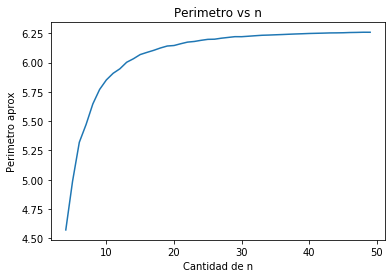

In [53]:
%%time
import numpy as np
import math
import matplotlib.pyplot as plt

def distancia(angulos):
    angulos.sort()
    sum = 0
    for i in range(0, len(angulos)):
        if i == len(angulos)-1:
            delta_x = math.cos(angulos[i]) - math.cos(angulos[0])
            delta_y = math.sin(angulos[i]) - math.sin(angulos[0])
            sum += (delta_x**2 + delta_y**2)**0.5
        else:
            delta_x = math.cos(angulos[i]) - math.cos(angulos[i+1])
            delta_y = math.sin(angulos[i]) - math.sin(angulos[i+1])     
            sum += (delta_x**2 + delta_y**2)**0.5
    return sum

prom_perimetro = []
desv_est = []
valores_n = range(4, 50)
for n in valores_n:
    perimetros = []
    for i in range(0, 1000): 
        ls_angulos = np.random.uniform(0, 2*math.pi, n)
        perimetros.append(distancia(ls_angulos))
    np_perimetros = np.asarray(perimetros)
    prom_perimetro.append(np_perimetros.mean())
    desv_est.append(np_perimetros.std())

plt.plot(valores_n, prom_perimetro)
plt.xlabel('Cantidad de n')
plt.ylabel('Perimetro aprox')
plt.title('Perimetro vs n')
plt.show
        
        
print(prom_perimetro)

## 4. Bingo Ball (30p)

A usted se le ha presentado la oportunidad de ganar un increíble premio que cuesta 10 veces el valor de 1 intento en el juego de de "Bingo Ball", el juego consiste en lo siguiente (instrucciones abajo del diagrama)

<img src="img/game.png">

En el diagrama, los círculos representan "etapas" por las que la bolita puede pasar. El funcionamiento del juego es el siguiente:

* Usted lanzará 7 bolitas secuencialmente.
* Cada bolita llega inicialmente a A, B, C o D (no entre medio o a algún otro lugar). Esto se asume equiprobable a menos que se diga lo contrario.
* En cada etapa la bolita tiene la posibilidad de caer hacia la izquierda o a la derecha. Ciertas etapas (relleno amarillo) hacen que la bolita caiga en una única dirección ya que la bolita caería del tablero si no fuera así.
* La bolita si o sí pasará por una y solo una etapa de cada fila $F_{i}\;\; i \in [1,4]$ (linea punteada en el diagrama)
* Usted ganará el juego si cada zona final (1,2,3,4) es alcanzada al menos 1 vez por cada bolita.

>En palabras simples, la bolita va bajando mientras cambia (o no) de dirección al chocar con los puntos negros.


A continuación, se presenta un ejemplo del recorrido de una bola:

<img src="img/game2.png">

Como puede ver, la bola inicialmente llegó a "A", luego su recorrido fue: izquierda, derecha (no hay otra opción), derecha, derecha y finalmente llegó a la zona 2.

El tablero que se presenta en ambos diagramas es el mismo tablero que deberá simular (es fijo). 
Considere que $P(irse\;a\;la\;izquierda) = 0.5$ a menos que se indique lo contrario.

En base a esto responda:

>a) ¿La cantidad de bolitas suministradas es suficiente para poder obtener el premio a un precio menor que el original?


> b) Para $4 \leq n \leq 100$ calcule la probabilidad de ganar el juego al menos 1 vez en función de $n$ bolas. Presente el resultado en un gráfico de Probabilidad v/s $n$.

No basta 1 simulación para cada $n$

>c) Si a usted le queda 1 bola restante y solamente le falta cubrir la zona 3 determine la zona inicial a la que deberá apuntar el tiro para maximizar la probabilidad de ganar. 

>d) Determine la probabilidad de alcanzar cada zona final si la bola llega inicialmente a "A". Repita el procedimiento pero esta vez utilizando "C" como punto de partida.

>e) Si ahora la bola tiene un 70% de probabilidad de mantener la dirección actual y un 30% de cambiar de dirección ¿Mantiene la respuesta dada en a)?

En la zona inicial (A,B,C,D) tiene la misma probabilidad de irse tanto a la izquierda como a la derecha, pero en las siguientes zonas si la bolita fue a la izquierda tiene un 70% de irse a la izquierda y un 30% de irse a la derecha, si después se va a la derecha tiene un 70% de probabilidad de irse a la derecha y así sucesivamente.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)